# US Acidents Data Analysis(2016-2021)

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

Using Python and its library we are going to Analyze the Accidents data in various graphical format

Imported libraries that are to be used for analysiation and visualisation

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
%matplotlib inline
sns.set_style("darkgrid")

## Data Collection

- Collected data from Kaggle.com
- Accessed the data through Kaggle directly to the Jupyter Notebook using Python Library "opendatasets"

download_url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

## Data Preparation and Cleaning

##### Opened the downloaded file to the DataFrame 'df'

In [4]:
datafilename='./us-accidents/US_Accidents_Dec21_updated.csv'

In [5]:
df = pd.read_csv(datafilename)

In [4]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

##### There are Total 2845342 rows and 47 Columns

In [6]:
numerical=['int16','int32','int64','float16','float32','float64']
numerical_column=df.select_dtypes(include=numerical)
len(numerical_column.columns)

14

###### To find the percentage of null values in each column

In [7]:
missing_percentage=(df.isna().sum().sort_values(ascending=False)/len(df))*100

In [8]:
missing_percentage

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<AxesSubplot: >

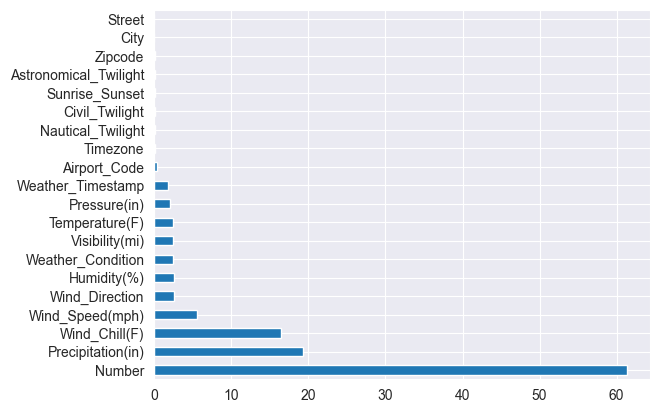

In [9]:
missing_percentage[missing_percentage>0].plot(kind='barh')

In [10]:
np.random.rand(5)

array([0.1881232 , 0.28292584, 0.74648001, 0.39334991, 0.00134528])

([<matplotlib.patches.Wedge at 0x2747d67de50>,
 [Text(-0.10109360846247956, 1.4263107193276423, 'Number'),
  Text(-1.0019019864312544, -0.7755400333627035, 'Precipitation(in)'),
  Text(0.06430659029299637, -1.3608964829979544, 'Wind_Chill(F)'),
  Text(0.7014926047150455, -0.9461814418980032, 'Wind_Speed(mph)'),
  Text(0.8384895846276229, -0.7275971836232273, 'Wind_Direction'),
  Text(1.5962586902764722, -1.037762065467036, 'Humidity(%)'),
  Text(1.223545410584032, -0.57776881591182, 'Weather_Condition'),
  Text(1.2089925506582924, -0.3849724434966119, 'Visibility(mi)'),
  Text(1.7175971755180748, -0.30662591143306966, 'Temperature(F)'),
  Text(1.476576978981245, -0.08236870006436692, 'Pressure(in)')])

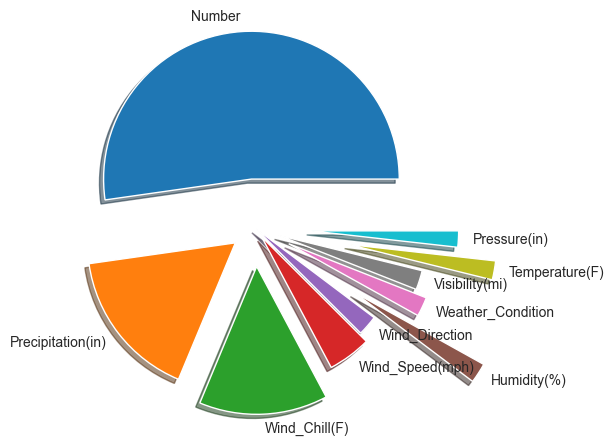

In [108]:
plt.pie(missing_percentage[missing_percentage>0][0:10],labels=missing_percentage[missing_percentage>0][0:10].keys(),explode=np.random.rand(10),shadow=True)
# ,explode=np.random.rand(len(missing_percentage[missing_percentage>0

## Explotary Analysis and Visualisation

In [12]:
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [13]:
city_by_accident=df.City.value_counts()

In [14]:
city_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

<AxesSubplot: >

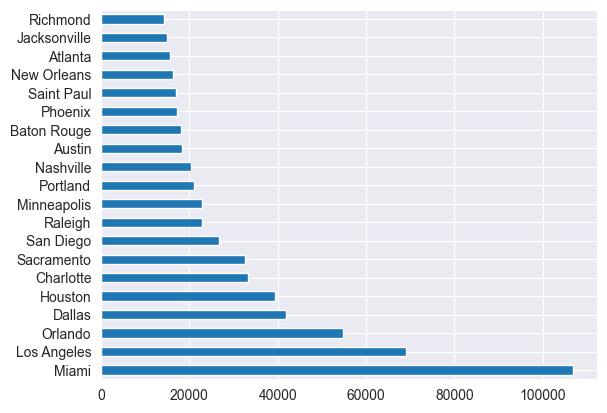

In [15]:
city_by_accident[0:20].plot(kind='barh')

###### From the above Analysis and Visualisation we can conclude that Miami is the city with higher no. of Accidents

In [16]:
higher_accident_city=city_by_accident[city_by_accident >1000]
lower_accident_city=city_by_accident[city_by_accident <=1000]

In [17]:
higher_accident_city

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
                ...  
Camden           1009
Victorville      1005
Tualatin         1001
Utica            1001
Los Banos        1001
Name: City, Length: 494, dtype: int64

<AxesSubplot: xlabel='City', ylabel='Count'>

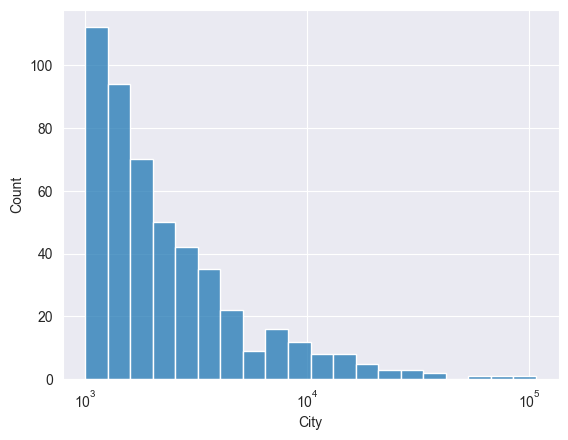

In [18]:
sns.histplot(higher_accident_city,log_scale=True)

###### The Accident Data is exponentially Decreasing as moving forward to another city 

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_26472\310929852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lower_accident_city)


<AxesSubplot: xlabel='City', ylabel='Density'>

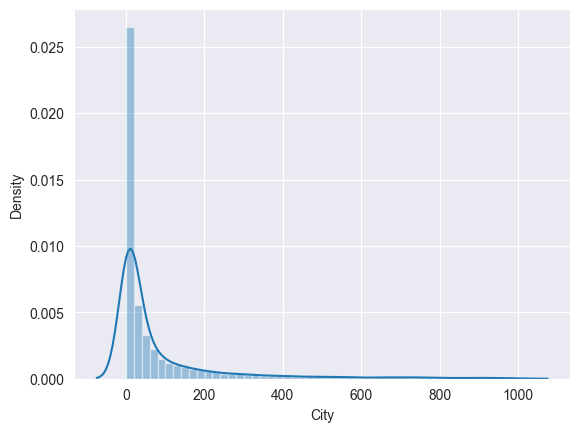

In [19]:
sns.distplot(lower_accident_city)

<AxesSubplot: xlabel='City', ylabel='count'>

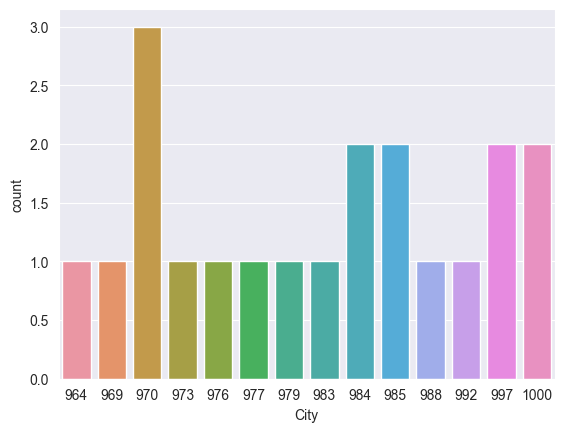

In [114]:
sns.countplot(x=lower_accident_city.keys()[:20],data=lower_accident_city)

In [21]:
df.Start_Time =pd.to_datetime(df.Start_Time)
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [22]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

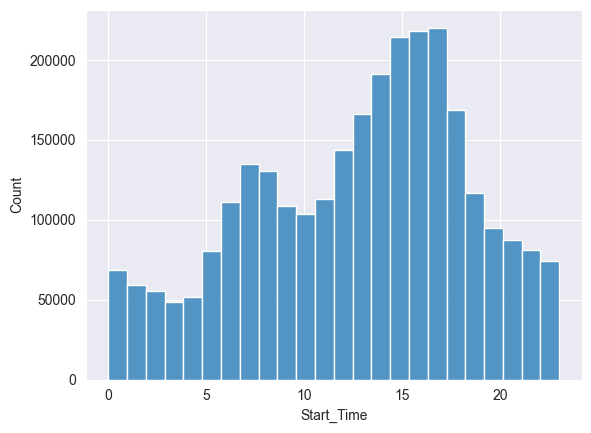

In [23]:
sns.histplot(df.Start_Time.dt.hour,bins=24)

###### Most of the Accidents tooks place in the morning when the crowd is running for the office and also at the time of evening when the crowd is returning from the office or moving out for recreation.

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_26472\691620235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek,bins=7,norm_hist=True,kde=False)


<AxesSubplot: xlabel='Start_Time'>

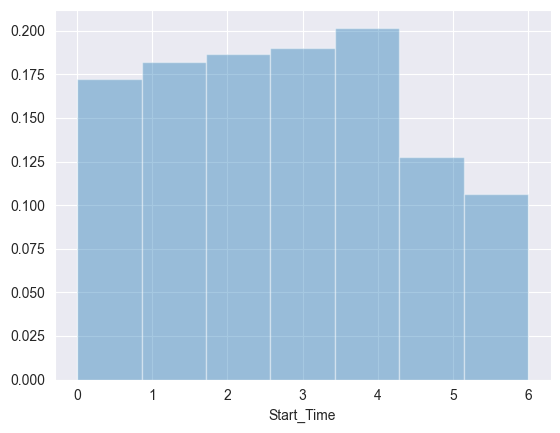

In [24]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,norm_hist=True,kde=False)

###### Weekends are having less accident no. as there is less rush for Office chores

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_26472\3869694919.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.month,bins=12,norm_hist=True,kde=False)


<AxesSubplot: xlabel='Start_Time'>

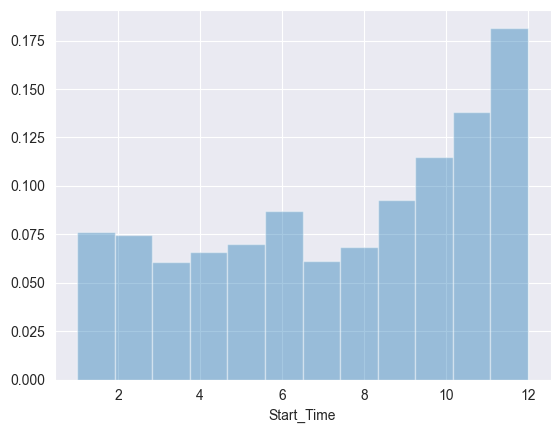

In [25]:
sns.distplot(df.Start_Time.dt.month,bins=12,norm_hist=True,kde=False)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_26472\1256160397.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.year,bins=5,norm_hist=True,kde=False)


<AxesSubplot: xlabel='Start_Time'>

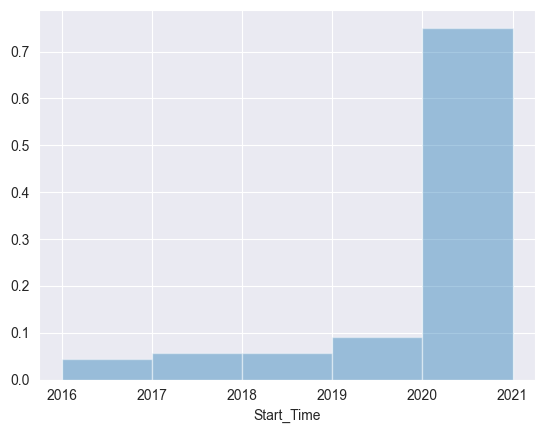

In [115]:
sns.distplot(df.Start_Time.dt.year,bins=5,norm_hist=True,kde=False)

###### Looks like 2021 is the year of higher no. of accidents (Might be more data is available for 2021)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_26472\3032833783.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_year_2016.Start_Time.dt.month,bins=12,norm_hist=True,kde=False)


<AxesSubplot: xlabel='Start_Time'>

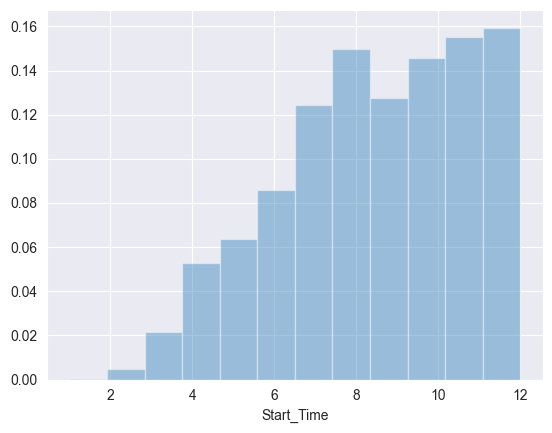

In [26]:


df_year_2016=df[df.Start_Time.dt.year==2016]

sns.distplot(df_year_2016.Start_Time.dt.month,bins=12,norm_hist=True,kde=False)

In [77]:
Amenity=(df.Amenity[df.Amenity==True].count()/len(df))*100
Bump=(df.Bump[df.Bump==True].count()/len(df))*100
Crossing=(df.Crossing[df.Crossing==True].count()/len(df))*100
Give_Way=(df.Give_Way[df.Give_Way==True].count()/len(df))*100
Junction=(df.Junction[df.Junction==True].count()/len(df))*100
Railway=(df.Railway[df.Railway==True].count()/len(df))*100
Station=(df.Station[df.Station==True].count()/len(df))*100
Traffic_Signal=(df.Traffic_Signal[df.Traffic_Signal==True].count()/len(df))*100


([<matplotlib.patches.Wedge at 0x2747dabf970>,
 [Text(1.094543749738396, 0.10942568212541226, 'Amenity'),
  Text(1.0774304940811148, 0.22168340132748998, 'Bump'),
  Text(0.667017002095661, 0.8746932713330526, 'Crossing'),
  Text(-0.09414709002429704, 1.0959636515140259, 'Give_Way'),
  Text(-1.0014732227727956, 0.4550289925587936, 'Junction'),
  Text(-0.8495795585736766, -0.6987235316301841, 'Railway'),
  Text(-0.5842131986639916, -0.9320380563618568, 'Station'),
  Text(0.6449234091429923, -0.8911081844194793, 'Traffic_Signal')],
 [Text(0.5970238634936705, 0.059686735704770316, '3.2%'),
  Text(0.5876893604078808, 0.12091821890590361, '0.1%'),
  Text(0.3638274556885423, 0.4771054207271196, '22.7%'),
  Text(-0.05135295819507111, 0.5977983553712868, '0.8%'),
  Text(-0.5462581215124339, 0.24819763230479647, '32.9%'),
  Text(-0.4634070319492781, -0.3811219263437367, '2.6%'),
  Text(-0.31866174472581354, -0.5083843943791946, '7.7%'),
  Text(0.3517764049870867, -0.48605900968335225, '30.1%')])

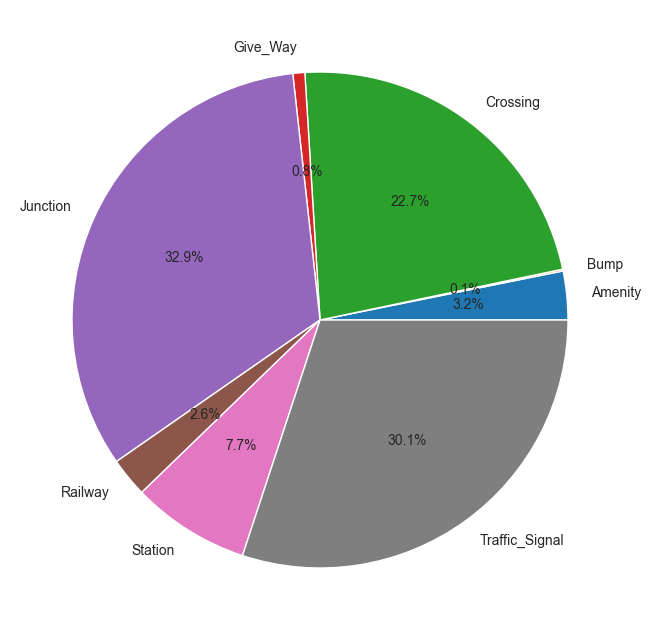

In [100]:
# labels=[Amenity,Bump,Crossing,Give_Way,Junction,Railway,Station,Traffic_Signal],
plt.figure(figsize=(8,12))
plt.pie([Amenity,Bump,Crossing,Give_Way,Junction,Railway,Station,Traffic_Signal],labels=['Amenity','Bump','Crossing','Give_Way','Junction','Railway','Station','Traffic_Signal'],autopct='%.01f%%')
# plt.legend(['Amenity','Bump','Crossing','Give_Way','Junction','Railway','Station','Traffic_Signal'],loc=1)

###### The Most no. of Accident took place at 'Junction','Traffic Signal' and 'Crossing'

<AxesSubplot: >

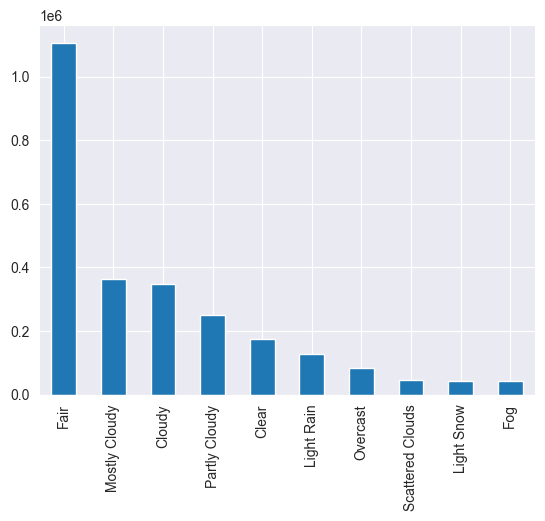

In [137]:
df.Weather_Condition.value_counts()[0:10].plot(kind='bar')

###### From the above data we can conclude that most accidents took place on 'Fair' or regular day ,weather condition doesnt have major impact on the accident rate, but still most no. of accidnets are due unfair waether condition like 'Cloudy','Foggy','Rain','Light Snow'

In [44]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [45]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [46]:
sample_data=df.sample(int(0.01*len(df)))

<AxesSubplot: xlabel='Start_Lng', ylabel='Start_Lat'>

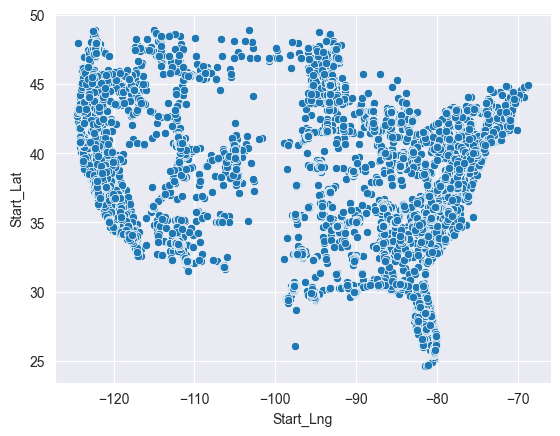

In [30]:
sns.scatterplot(x=sample_data.Start_Lng,y=sample_data.Start_Lat,data=sample_data)

In [31]:
from folium.plugins import HeatMap

In [32]:
list(zip(list(sample_data.Start_Lat),list(sample_data.Start_Lng)))

[(30.368528, -91.012205),
 (33.93916, -117.186602),
 (41.562585, -72.31626899999998),
 (47.288355, -95.934169),
 (33.331790000000005, -117.15851),
 (39.786229, -75.3334),
 (30.68261, -88.22546),
 (37.317935, -121.980482),
 (42.938205, -85.648997),
 (43.442737, -124.221498),
 (33.42736, -117.149126),
 (42.966166, -83.810867),
 (39.768142, -84.195998),
 (32.792551, -96.798084),
 (33.870216, -118.100141),
 (34.156884000000005, -118.379247),
 (34.183347999999995, -92.044647),
 (32.67094, -114.29888),
 (42.38537, -83.0234),
 (40.996781, -73.728507),
 (25.797918, -80.369176),
 (38.64364000000001, -121.10885),
 (28.201378, -82.645077),
 (33.9878, -118.40277),
 (34.068614000000004, -117.375816),
 (39.967678, -76.719842),
 (44.070357, -92.503155),
 (44.89891, -93.40153),
 (28.21513, -82.4375),
 (33.989797, -117.275259),
 (34.19618, -118.40266),
 (25.972063, -80.150051),
 (29.714083, -95.54147),
 (36.133529, -95.862011),
 (36.974947, -121.886394),
 (40.444353, -78.43346700000002),
 (25.925921, -

In [33]:
lat_lon_pairs=list(zip(list(sample_data.Start_Lat),list(sample_data.Start_Lng)))
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

###### Intensity of the accident taking place at the particular area

## Summary

- Top 5 cities with highest no. of Accidents:-
    Miami                           
    Los Angeles                      
    Orlando                          
    Dallas                           
    Houston
- Morning 8-10 and Evening 3-6 is the time where most of the Accident took Place
- Weekends(Sataurday and Sunday) is having less no. of accidents in terms of Day of Week
- Year on Year no. of Accidents are increasing
- Most accidents took place on 'Fair' or regular day ,weather condition doesnt have major impact on the accident rate, but still most no. of accidnets are due unfair waether condition like 'Cloudy','Foggy','Rain','Light Snow'


In [6]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
